In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv('placement.csv')
# df.sample()
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


C:\Users\Dell\AppData\Local\Temp\ipykernel_2836\824786033.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_2836\824786033.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['package'])


<Axes: xlabel='package', ylabel='Density'>

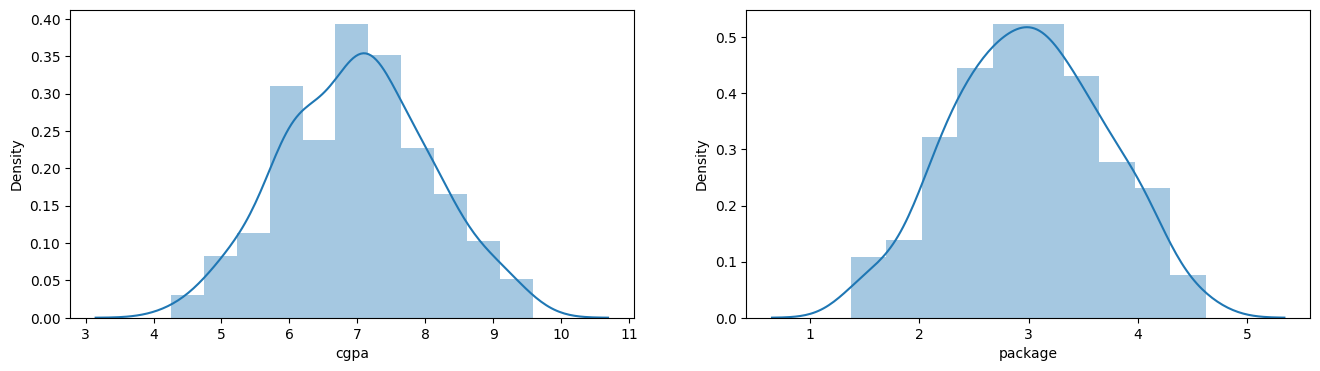

In [48]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['package'])

In [49]:
df.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


In [50]:
print('Higher', df['cgpa'].mean()+2*df['cgpa'].std())
print('Lower', df['cgpa'].mean()-2*df['cgpa'].std())

Higher 9.129317359779106
Lower 4.851682640220895


In [51]:
df[(df['cgpa']<4.85) | (df['cgpa']>9.12)]


,cgpa,package
40,9.38,4.02
50,9.58,4.43
51,9.26,3.79
63,9.16,4.25
84,4.26,1.53
85,4.79,1.48
88,4.73,1.48
169,9.31,4.37
193,4.57,1.94


# Trimming

## First Way to remove Outliers

In [52]:
new_df  = df[(df['cgpa']>4.85) & (df['cgpa']<9.12)]
new_df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


C:\Users\Dell\AppData\Local\Temp\ipykernel_2836\4101662708.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['cgpa'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_2836\4101662708.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['package'])


<Axes: xlabel='package', ylabel='Density'>

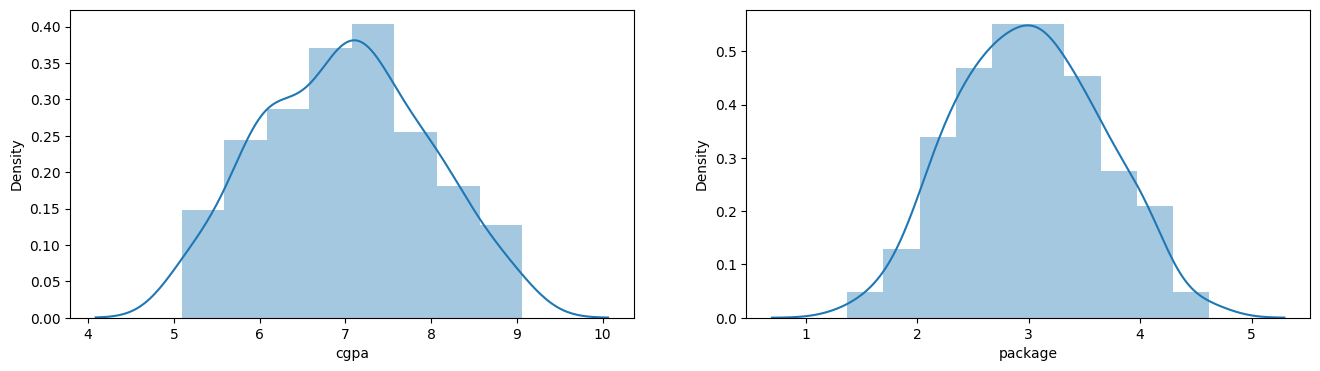

In [54]:
plt.figure(figsize= (16,4))
plt.subplot(1,2,1)
sns.distplot(new_df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(new_df['package'])

## Second Way to remove Outliers

In [56]:
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/ df['cgpa'].std()

In [57]:
df.head()

,cgpa,package,cgpa_zscore
0,6.89,3.26,-0.093977
1,5.12,1.98,-1.749097
2,7.82,3.25,0.775662
3,7.42,3.67,0.401624
4,6.94,3.57,-0.047222


In [58]:
df.describe()

,cgpa,package,cgpa_zscore
count,200.000000,200.000000,2.000000e+02
mean,6.990500,2.996050,-7.660539e-16
std,1.069409,0.691644,1.000000e+00
min,4.260000,1.370000,-2.553280e+00
25%,6.190000,2.487500,-7.485445e-01
50%,6.965000,2.995000,-2.384495e-02
75%,7.737500,3.492500,6.985169e-01
max,9.580000,4.620000,2.421432e+00


In [59]:
df[(df['cgpa_zscore']>2) | (df['cgpa_zscore']<-2)]

,cgpa,package,cgpa_zscore
40,9.38,4.02,2.234412
50,9.58,4.43,2.421432
51,9.26,3.79,2.122201
63,9.16,4.25,2.028691
84,4.26,1.53,-2.553280
85,4.79,1.48,-2.057679
88,4.73,1.48,-2.113785
143,4.85,1.54,-2.001573
169,9.31,4.37,2.168956
193,4.57,1.94,-2.263400


In [60]:
new_df = df[(df['cgpa_zscore']<2) & (df['cgpa_zscore']>-2)]
new_df

,cgpa,package,cgpa_zscore
0,6.89,3.26,-0.093977
1,5.12,1.98,-1.749097
2,7.82,3.25,0.775662
3,7.42,3.67,0.401624
4,6.94,3.57,-0.047222
...,...,...,...
195,6.93,2.46,-0.056573
196,5.89,2.57,-1.029073
197,7.21,3.24,0.205254
198,7.63,3.96,0.597994


C:\Users\Dell\AppData\Local\Temp\ipykernel_2836\1500694714.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['cgpa_zscore'])


<Axes: xlabel='cgpa_zscore', ylabel='Density'>

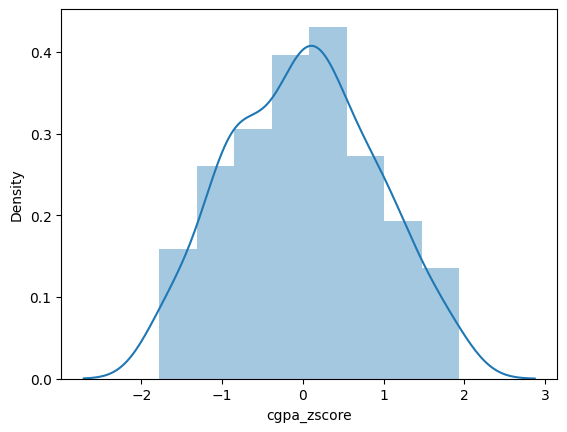

In [61]:
sns.distplot(new_df['cgpa_zscore'])